In [1]:
'''ML Project #2: Stock Price Predictor using LSTM Neural Network

    1) Predict stock price using LSTM(Long Short Term Memory) neural network (A type of RNN - Recurrent Neural Network)
    2) Create a Dashboard for visualization using Plotly dash for stock analysis
    
Source: https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/

        https://colah.github.io/posts/2015-08-Understanding-LSTMs/
        http://karpathy.github.io/2015/05/21/rnn-effectiveness/'''
        
#FUTURE GOAL: Apply to Oil Prices?

'ML Project #2: Stock Price Predictor using LSTM Neural Network\n\n    1) Predict stock price using LSTM(Long Short Term Memory) neural network (A type of RNN - Recurrent Neural Network)\n    2) Create a Dashboard for visualization using Plotly dash for stock analysis\n    \nSource: https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/\n\n        https://colah.github.io/posts/2015-08-Understanding-LSTMs/\n        http://karpathy.github.io/2015/05/21/rnn-effectiveness/'

In [2]:
'''To use Tensorflow:
    
    - Create virtual environment using conda by cloning base to avoid reinstalling other packages
    
    1) conda create -n your-env-name --clone base
    2) conda activate your-env-name
    3) conda list -n your-env-name
    4) pip install --upgrade pip
    5) pip install --upgrade tensorflow  //  pip install --ignore-installed --upgrade tensorflow==2.2.0 '''

#https://medium.com/analytics-vidhya/install-tensorflow-2-0-along-with-all-packages-on-anaconda-for-windows-10-and-ubuntu-86a89ba51983
#Source: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

#LSTM Source: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#LSTM Diagnosis: https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

'To use Tensorflow:\n    \n    - Create virtual environment using conda by cloning base to avoid reinstalling other packages\n    \n    1) conda create -n your-env-name --clone base\n    2) conda activate your-env-name\n    3) conda list -n your-env-name\n    4) pip install --upgrade pip\n    5) pip install --upgrade tensorflow  //  pip install --ignore-installed --upgrade tensorflow==2.2.0 '

In [3]:
#import modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

#access keras package through Tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

In [4]:
#read dataset into DF

filepath = './NSE-Tata-Global-Beverages-Limited.csv'
df = pd.read_csv(filepath)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


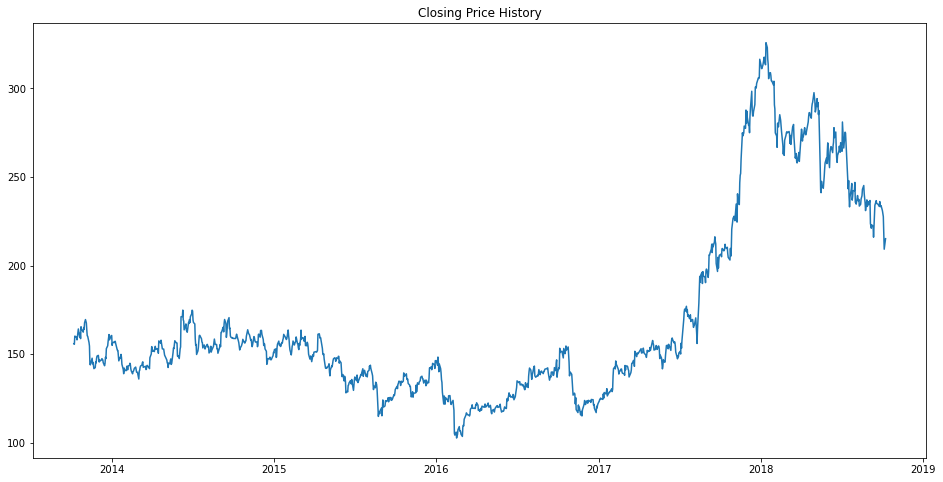

In [5]:
#analyze closing prices 

# convert date string to Panda datetime format
df['Date'] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']

#Plot Closing Price History
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Closing Price History')
plt.show()

In [6]:
#Sort dataset on date time and filter Date & Close cols

data = df.sort_index(ascending=True, axis=0)
final_dataset = pd.DataFrame(index=range(0,len(df)), columns=['Close'])

final_dataset.index = data['Date']

for i in range(0,len(data)):
    final_dataset['Close'][i] = data['Close'][i]

final_dataset

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [7]:
#Function to split univariate sequence to samples by specified time steps

def split_sequence(sequence, n_steps):
    x_train, y_train = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x_train.append(seq_x)
        y_train.append(seq_y)
    return np.array(x_train), np.array(y_train)


In [8]:
#normalize train data before sample generation

final_array = final_dataset.to_numpy()

train_data = final_array[:987]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data)

scaled_data

array([[0.46807574],
       [0.46587406],
       [0.50638485],
       [0.50550418],
       [0.50022017],
       [0.4878908 ],
       [0.52267723],
       [0.54205196],
       [0.50154117],
       [0.52135623],
       [0.49405548],
       [0.55306033],
       [0.53896962],
       [0.5336856 ],
       [0.52619991],
       [0.54909731],
       [0.54029062],
       [0.57287539],
       [0.58872743],
       [0.57199472],
       [0.53632761],
       [0.50814619],
       [0.50594452],
       [0.47468076],
       [0.45706737],
       [0.36679877],
       [0.36371642],
       [0.39674152],
       [0.36900044],
       [0.37604579],
       [0.36107442],
       [0.34478203],
       [0.35006605],
       [0.3773668 ],
       [0.37340379],
       [0.39630119],
       [0.40730956],
       [0.41083223],
       [0.3888155 ],
       [0.37780713],
       [0.3874945 ],
       [0.38353148],
       [0.38793483],
       [0.39453985],
       [0.39057684],
       [0.38837517],
       [0.37428446],
       [0.359

In [9]:
#sample generation using func

raw_sequence = scaled_data.reshape(-1)

time_steps = 60

x_train, y_train = split_sequence(raw_sequence,time_steps)

#prints (no_samples, no_timesteps)
print(x_train.shape)

(927, 60)


In [10]:
#reshape input to include features 
n_features = 1
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],n_features))
print(x_train.shape)


(927, 60, 1)


In [11]:
#Build & train LSTM model
#Source: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

#define stacked LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, n_features)))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [12]:
#fit model
lstm_model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

927/927 - 32s - loss: 0.0060


In [13]:
#test model prediction capability

test_data = final_array[987-time_steps:]

test_scaled_data = scaler.fit_transform(test_data)
raw_test_sequence = test_scaled_data.reshape(-1)

time_steps = 60

x_test, y_test = split_sequence(raw_test_sequence,time_steps)

n_features = 1
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],n_features))
print(x_test.shape)

(248, 60, 1)


In [14]:
closing_price = lstm_model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

closing_price.shape

(248, 1)

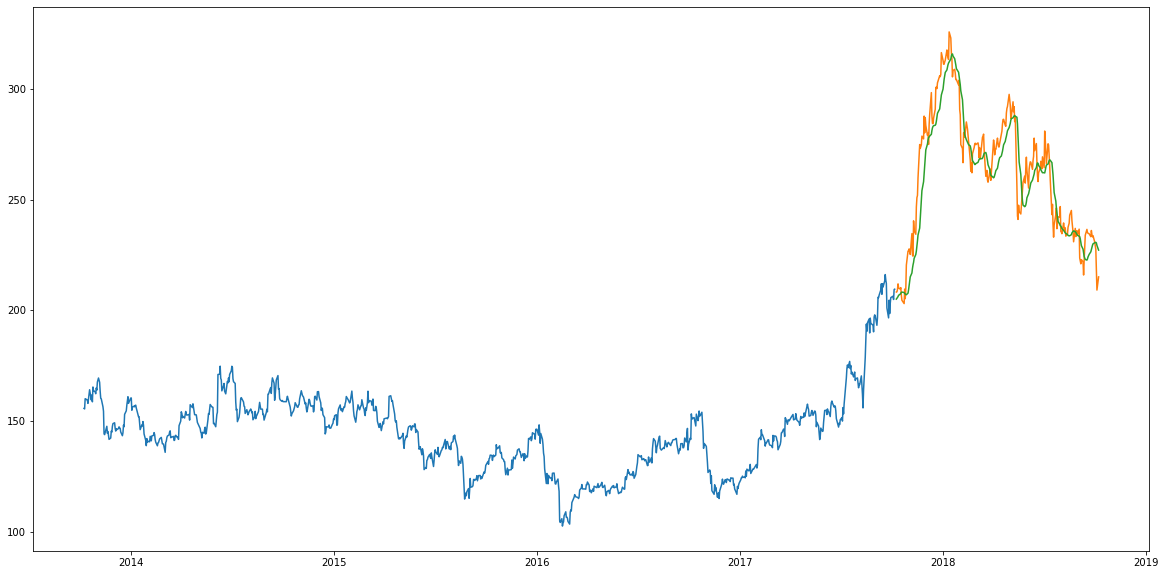

In [21]:
#compare prediction results

historical_data = final_dataset[:987]
valid_data = pd.DataFrame(index=range(0,len(final_array)-len(train_data)), columns=['Actual','Predicted'])

#compile results in dataframe
valid_data.index = data['Date'][987:]
valid_data['Actual'] = final_dataset['Close'] #matched based on date index
valid_data['Predicted'] = closing_price

#plot results
plt.plot(historical_data)
plt.plot(valid_data[['Actual','Predicted']])